<a href="https://colab.research.google.com/github/purnaa-l/MiniProject-ML-Models-All/blob/main/Clusters/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Bangalore_AQI_Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamchiragppatil/india-aqi-and-pollutant-levels-2018-2024",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-8-d6948ecc4fbc>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:         City      Date  AQI  PM2.5   PM10    NO2    SO2    CO    O3
0  Bangalore  01/01/18   68   37.4  73.44  56.44  77.52  0.71  64.6
1  Bangalore  02/01/18   76   41.8  82.08  63.08  86.64  0.80  72.2
2  Bangalore  03/01/18   70   38.5  75.60  58.10  79.80  0.74  66.5
3  Bangalore  04/01/18   78   42.9  84.24  64.74  88.92  0.82  74.1
4  Bangalore  05/01/18   82   45.1  88.56  68.06  93.48  0.86  77.9


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'])


<ipython-input-10-ea7d1ab55c55>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [13]:
# Average pollutant levels by date across all cities
daily_avg = df.groupby('Date')[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean()
print(daily_avg)

              AQI  PM2.5    PM10    NO2     SO2    CO      O3
Date                                                         
2018-01-01   68.0  37.40   73.44  56.44   77.52  0.71   64.60
2018-01-02   89.0  48.95   96.12  73.87  101.46  0.93   84.55
2018-01-03   72.0  39.60   77.76  59.76   82.08  0.76   68.40
2018-01-04  112.0  61.60  120.96  92.96  127.68  1.18  106.40
2018-01-05  108.0  59.40  116.64  89.64  123.12  1.13  102.60
...           ...    ...     ...    ...     ...   ...     ...
2024-12-27   54.0  29.70   58.32  44.82   61.56  0.57   51.30
2024-12-28   57.0  31.35   61.56  47.31   64.98  0.60   54.15
2024-12-29   70.0  38.50   75.60  58.10   79.80  0.74   66.50
2024-12-30   62.0  34.10   66.96  51.46   70.68  0.65   58.90
2024-12-31   65.0  35.75   70.20  53.95   74.10  0.68   61.75

[2556 rows x 7 columns]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_avg)


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
daily_avg['Cluster'] = kmeans.fit_predict(scaled_data)


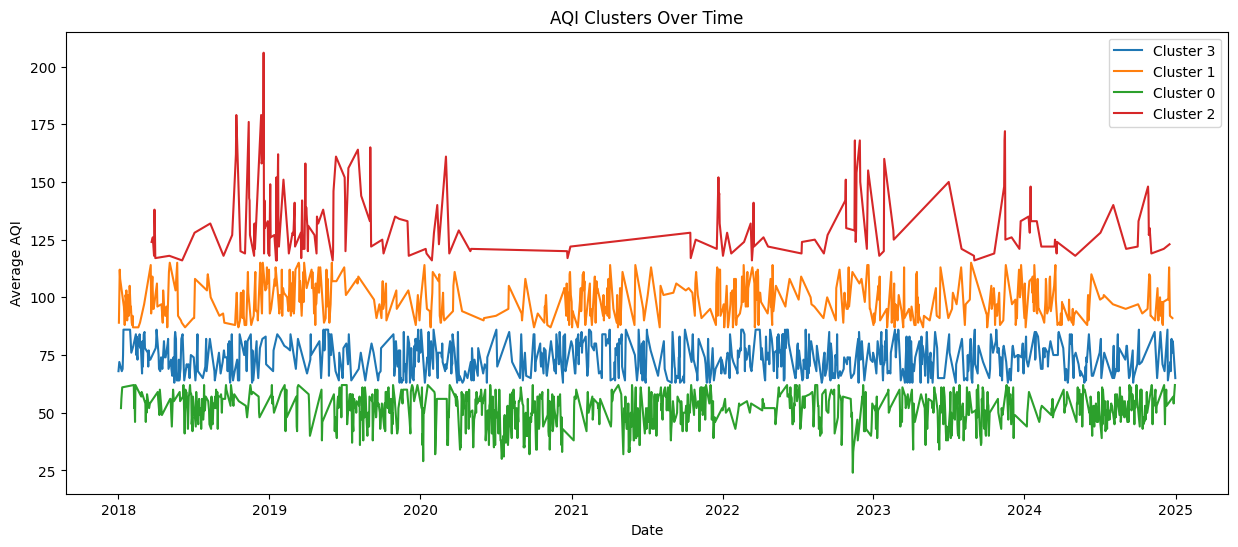

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
for cluster in daily_avg['Cluster'].unique():
    subset = daily_avg[daily_avg['Cluster'] == cluster]
    plt.plot(subset.index, subset['AQI'], label=f'Cluster {cluster}')
plt.legend()
plt.title('AQI Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.show()


In [16]:
# Calculate the mean AQI for each cluster
cluster_means = daily_avg.groupby('Cluster')['AQI'].mean()

# Define labels based on the AQI values
def label_cluster(aqi_mean):
    if aqi_mean < 50:
        return "Low Pollution"
    elif 50 <= aqi_mean < 100:
        return "Moderate Pollution"
    elif 100 <= aqi_mean < 150:
        return "High Pollution"
    else:
        return "Very High Pollution"

# Apply labels to each cluster
cluster_labels = cluster_means.apply(label_cluster)

# Map the labels back to the daily_avg dataframe
daily_avg['Cluster Label'] = daily_avg['Cluster'].map(cluster_labels)

# Print the result to verify the labels
print(cluster_labels)


Cluster
0    Moderate Pollution
1    Moderate Pollution
2        High Pollution
3    Moderate Pollution
Name: AQI, dtype: object


In [31]:
# Assuming you have already labeled your clusters as "Low Pollution", "Moderate Pollution", "High Pollution", and "Severe Pollution"
# And have added these labels in the 'Cluster Label' column of the dataframe `daily_avg`

# First, let's define the labels and filter the data
pollution_labels = {
    "Low Pollution": "Low Pollution",
    "Moderate Pollution": "Moderate Pollution",
    "High Pollution": "High Pollution",
    "Severe Pollution": "Very High Pollution"  # Assuming 'Severe' maps to 'Very High Pollution'
}

# Print dates for each pollution label
for label in pollution_labels.values():
    # Filter dates for the current pollution label
    filtered_data = daily_avg[daily_avg['Cluster Label'] == label]

    # Print the dates where the label is present
    print(f"Dates with {label}:")
    print(filtered_data.index.date)  # This will print the dates (index) for the given pollution level
    print("-" * 50)


Dates with Low Pollution:
[]
--------------------------------------------------
Dates with Moderate Pollution:
[datetime.date(2018, 1, 1) datetime.date(2018, 1, 2)
 datetime.date(2018, 1, 3) ... datetime.date(2024, 12, 29)
 datetime.date(2024, 12, 30) datetime.date(2024, 12, 31)]
--------------------------------------------------
Dates with High Pollution:
[datetime.date(2018, 3, 22) datetime.date(2018, 3, 25)
 datetime.date(2018, 3, 28) datetime.date(2018, 3, 29)
 datetime.date(2018, 3, 30) datetime.date(2018, 3, 31)
 datetime.date(2018, 5, 4) datetime.date(2018, 6, 4)
 datetime.date(2018, 7, 4) datetime.date(2018, 8, 11)
 datetime.date(2018, 9, 3) datetime.date(2018, 9, 12)
 datetime.date(2018, 10, 3) datetime.date(2018, 10, 12)
 datetime.date(2018, 10, 13) datetime.date(2018, 10, 23)
 datetime.date(2018, 11, 3) datetime.date(2018, 11, 12)
 datetime.date(2018, 11, 13) datetime.date(2018, 11, 14)
 datetime.date(2018, 11, 15) datetime.date(2018, 11, 25)
 datetime.date(2018, 11, 26) dat